<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Thursday, April 4**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Estimated time**      |  **10 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-1.ipynb` as part of your submission by pushing it to your forked GitLab repository. You need to add your student details below. Any changes to file name will mean your file can't be marked by the auto-grader, resulting in a `zero mark`.


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

<span style="color:blue">
    
### Student ID :  u6284513

### Student Name: Xuecheng Zhang
</span>

## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [50]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
sns.set_style("whitegrid")
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [51]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
import missingno as msno
# to install the package : conda install -c conda-forge missingno
import matplotlib as mpl
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [53]:
# YOUR CODE HERE
wholedf = pd.read_csv("bike-share.csv")
remove_dteday = wholedf.drop(['dteday'],axis=1)

# drop dteday


df_holi_cnt = remove_dteday[remove_dteday['holiday']==1].groupby('season',as_index=False)['casual','registered'].mean()
df_wk_cnt = remove_dteday[remove_dteday['workingday']==1].groupby('season',as_index=False)['casual','registered'].mean()
# weekday =1,2,3,4,5 and having holidays
# df_wk_cnt is making for the working day, df_holi_cnt is making for the holiday day 
# and they both calculate the mean of the data.

df_yr_cnt_0 = remove_dteday[remove_dteday['yr']==0].groupby('season',as_index=False)['cnt'].sum()
df_yr_cnt_1 = remove_dteday[remove_dteday['yr']==1].groupby('season',as_index=False)['cnt'].sum()

# made two new dataframe for each year and the sum of cnt for each season
# relationship between season and sum of the cnt

season_with_number = remove_dteday[:]

remove_dteday["season"]=remove_dteday["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
remove_dteday["weathersit"]=remove_dteday["weathersit"].map({1:"sunny",2:"cloudy",3:"rainy",4:"stormy"})
remove_dteday["weekday"]=remove_dteday["weekday"].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
# change the value for season and weather situation

season_with_number_year =  season_with_number[:]
season_with_number_year.season = season_with_number_year.season + season_with_number_year.yr *4
# change the season to season = season + yr*4
season_atemp_cnt = season_with_number_year[['season','atemp','cnt']]
# a dataframe which demonstrates season, atemp relationship with cnt



# (ADD ANY ADDITIONAL CELLS AS REQUIRED)
season_with_number_year.tail()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,5,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,5,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,5,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,5,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,5,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

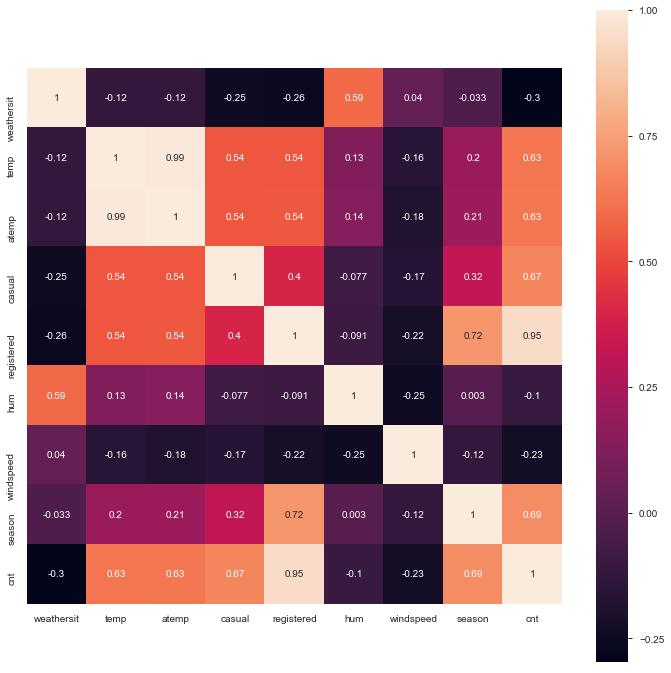

In [30]:
correlation = season_with_number[["weathersit","temp","atemp","casual","registered","hum","windspeed",'season',"cnt"]].corr()
# get the whole table correlation
fig=plt.figure(figsize=(12,12))
sns.heatmap(correlation, square=True,annot=True)
# build a heatmap
plt.show()


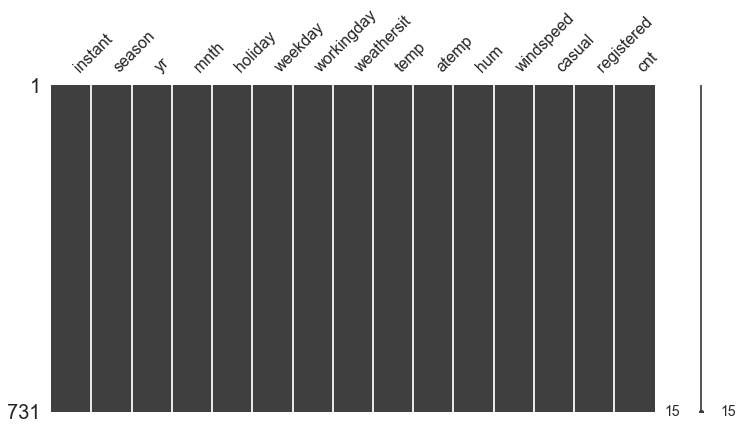

In [31]:
msno.matrix(remove_dteday,figsize=(12,6))
# Missing value processing, data missing values are an important factor affecting the quality of the data set,
# it is needed to look at the missing values
plt.show()

In [32]:
weather_count = remove_dteday.groupby(['weathersit']).size()
weather_count
# Get the number of days in four different weathers

weathersit
cloudy    247
rainy      21
sunny     463
dtype: int64

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [33]:
# 1）By the heatmap of correlation, it is manifect that 
# Cnt is positively correlated with regester and casual (greater than 0.5).
# The correlation between cnt and windspeed is relatively small. What is more, humidity is much less related to the cnt(-0.1).
# Cnt and humidity is negatively related.
# Temperature is highly correlated with apparent temperature.(0.99)
# cnt has two main variables which is atemp and season
# 2）there is no data missing.

# 3）from "weather_count" we can see that there are no rainstorm data records, 
# indicating that there is very little data on this extreme weather situation.


## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

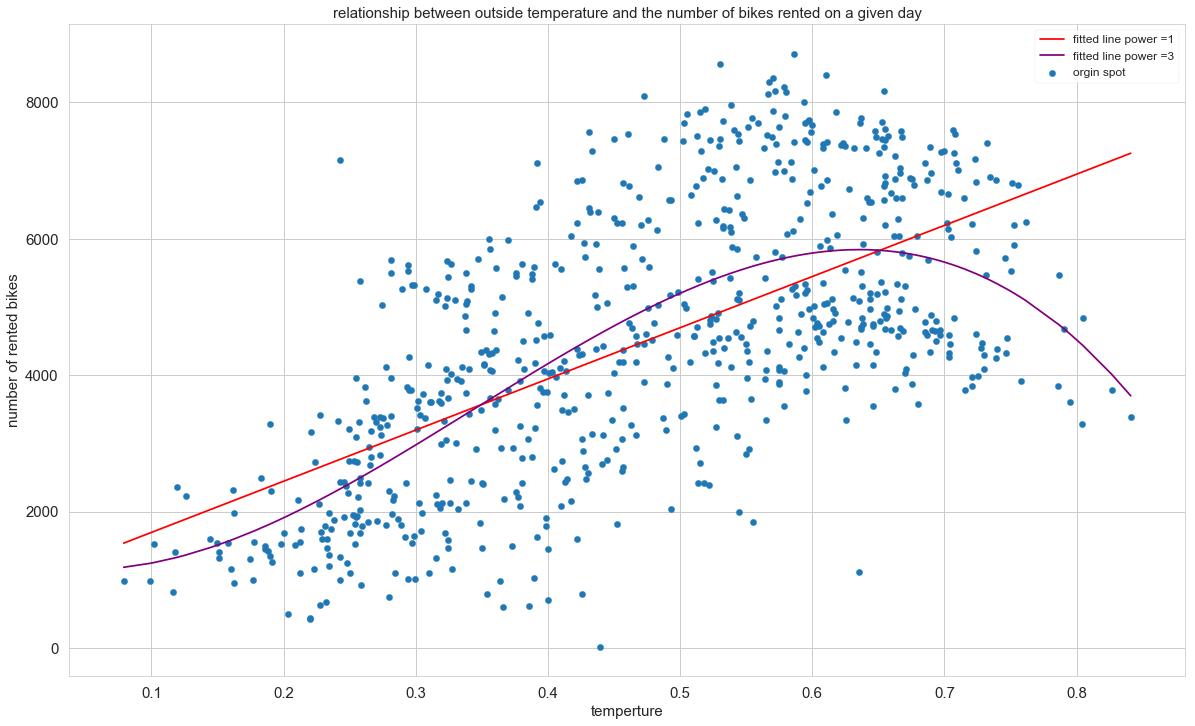

,atemp,cnt
atemp,1.000000,0.631066
cnt,0.631066,1.000000


In [49]:
# YOUR CODE HERE
plt.figure(figsize=(20,12))
# set the size of the figure
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x=(remove_dteday["atemp"])
y=(remove_dteday["cnt"])
# get each of the column
plt.xlabel('temperture',fontsize=15)
plt.ylabel('number of rented bikes',fontsize=15)
plt.title('relationship between outside temperature and the number of bikes rented on a given day',fontsize = 15)
plt.scatter(x, y,40,label = 'orgin spot')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color = 'red',label = 'fitted line power =1')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 3))(np.unique(x)),color = 'purple',label = 'fitted line power =3')
# add the fitting lines as 3 and 4 power
plt.legend(loc="upper right", prop={'size': 12})

# set the legend
plt.show()
correlation = remove_dteday[['atemp','cnt']].corr()
correlation 
# to get the correlation
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)


In [35]:
# # Q1(1).from the scatter plot we can see that, the number of bikes has some connection with the outside temperature. When the temperature is neither 
# too high or too low(something like 0.6), people are the most likely to rent bikes. When the temperature is too cold, people seem not to ride a bike
# and record a lower number of rented bikes. However,some of data are outliers, maybe some other factors like the poor weather can cause the problem.

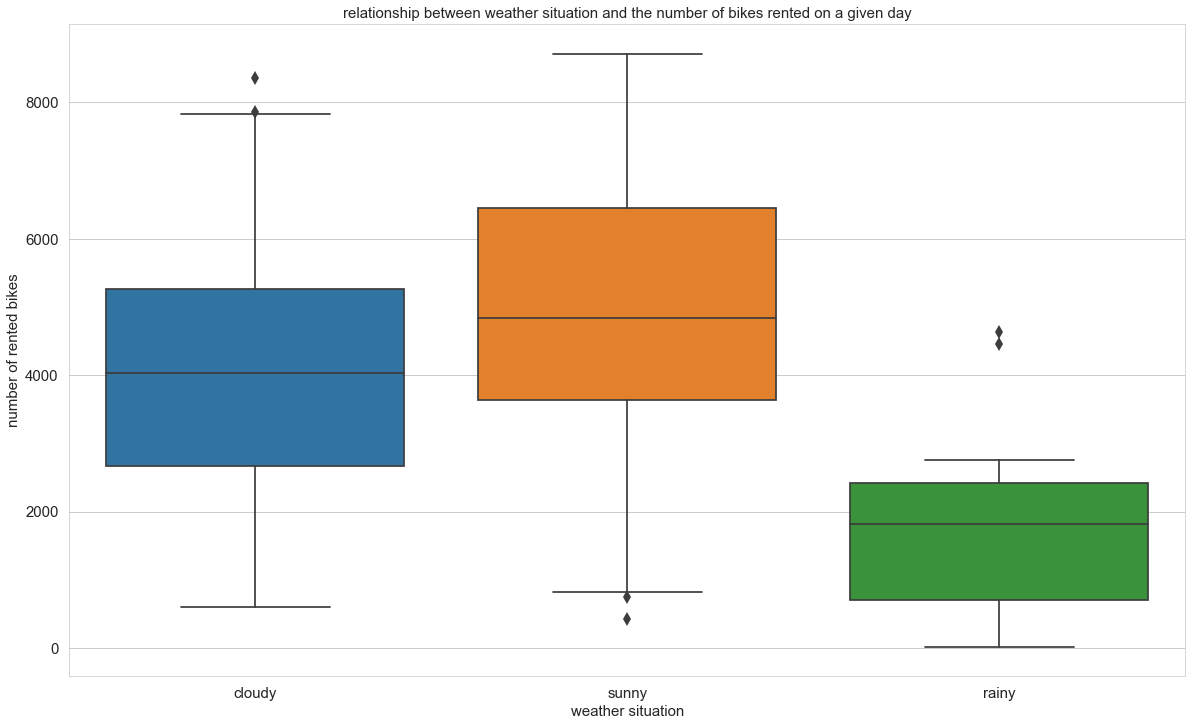

In [36]:
plt.figure(figsize=(20,12))
x=(remove_dteday["weathersit"])
y=(remove_dteday["cnt"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1,4)
plt.title('relationship between weather situation and the number of bikes rented on a given day',fontsize=15)
sns.boxplot(x,y,data=remove_dteday,whis=1,fliersize=10)
# create a boxplot
plt.xlabel('weather situation',fontsize=15)
plt.ylabel('number of rented bikes',fontsize=15)
plt.show()

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [37]:
# Q1(2)# the boxplot shows that the number of rented bikes has some connection with the weather situation. For weathersit = 3 
# (i.e. rainy day, not a good weather),people are not willing to rent bikes on that day. Compare weathersit =1 with weathersit=2,
#more bikes in a good weather are rented than those in the cloudy day relatively. However, as you can see from the boxplot, the gap between
# the minimum value and the maximum value is exetemely large. correlation = -0.29 means they have weak correlation

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

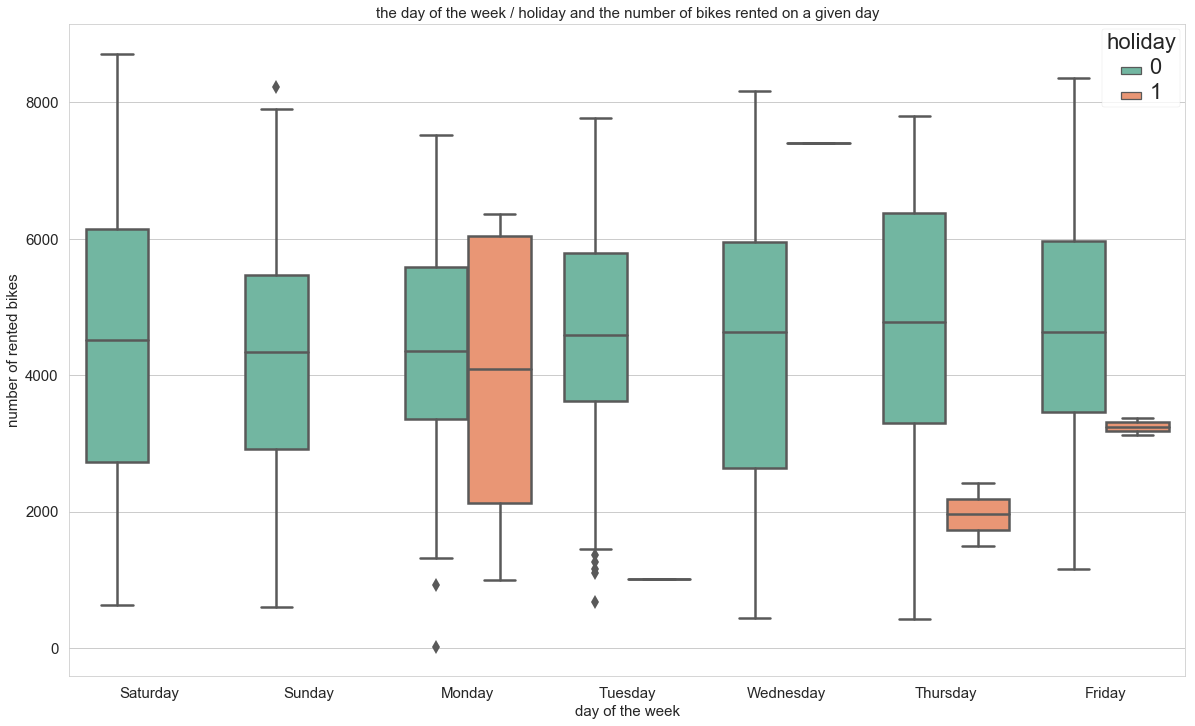

In [38]:
# YOUR CODE HERE
plt.figure(figsize=(20,12))
# draw the boxplot
plt.title('the day of the week / holiday and the number of bikes rented on a given day', fontsize=15)
ax = sns.boxplot(x="weekday", y="cnt", data=remove_dteday,hue='holiday',palette="Set2",linewidth=2.5,whis=1,fliersize=10)
# Draw a boxplot with nested grouping by two categorical variables
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel("day of the week", fontsize=15)
ax.set_ylabel("number of rented bikes", fontsize=15)
# set x and y label
x = remove_dteday['weekday']
y = remove_dteday['cnt']

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
    
plt.show()


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)


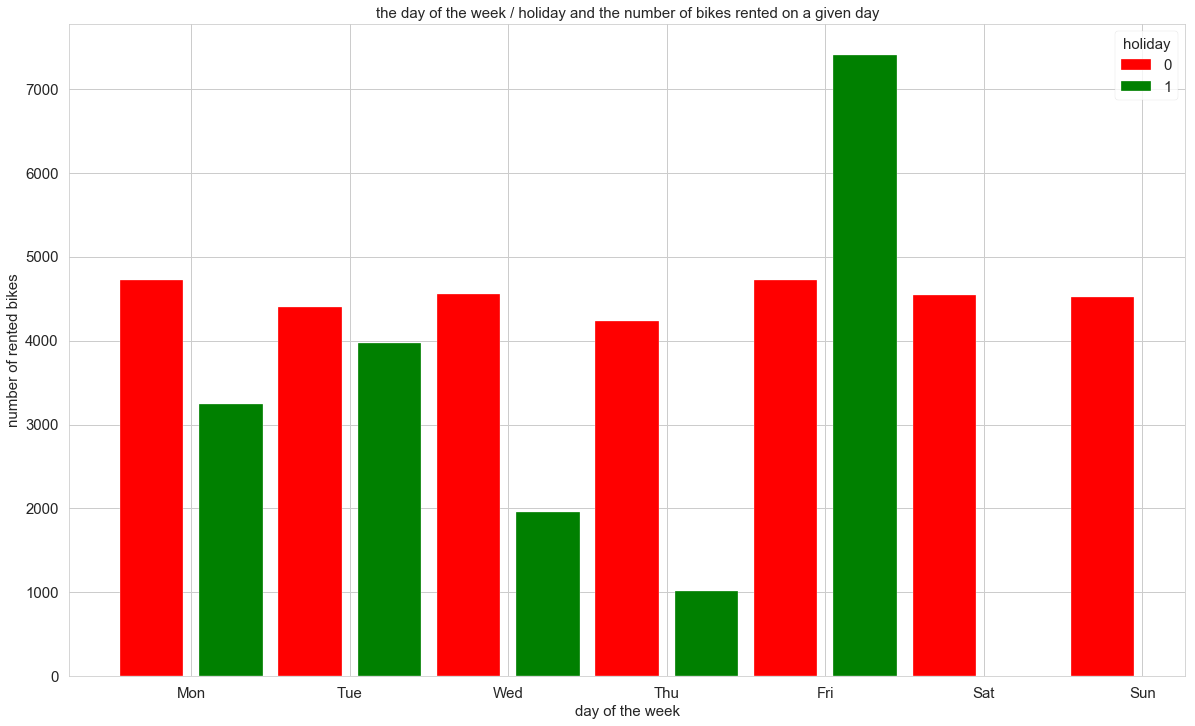

In [39]:
# YOUR CODE HERE
plt.figure(figsize=(20,12))
indexholiday = np.arange(5) 
indexwholiday = np.arange(7)
# get every index
remove_dteday_withhoilday = remove_dteday[remove_dteday['holiday']==1][['weekday','cnt']]
remove_dteday_withhoilday  = remove_dteday_withhoilday.groupby(['weekday'],as_index = False)[['cnt']].mean()

remove_dteday_withouthoilday =remove_dteday[remove_dteday['holiday']==0][['weekday','cnt']]
remove_dteday_withouthoilday  = remove_dteday_withouthoilday.groupby(['weekday'],as_index = False)[['cnt']].mean()

withholiday = plt.bar(indexholiday+0.25,remove_dteday_withhoilday['cnt'], width=0.4,color = 'green')
withoutholiday = plt.bar(indexwholiday-0.25,remove_dteday_withouthoilday['cnt'], width=0.4,color = 'red')

plt.xlabel('day of the week',fontsize = 15)
plt.ylabel('number of rented bikes',fontsize = 15)
plt.xticks(indexwholiday, ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'),fontsize=15)
plt.yticks(fontsize=15)

legend = plt.legend([withoutholiday,withholiday], [0,1],title = 'holiday',fontsize=15)
plt.setp(legend.get_title(),fontsize='15')
plt.title('the day of the week / holiday and the number of bikes rented on a given day', fontsize=15)
plt.show()


<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [40]:
# #Q2 Unfortunately,there is no relationship between holiday or week and the number of bikes rented on a given day.
# Although the day of week was changed, the average number of the rented bikes didn't change conspicuously. 
# When holiday is at Friday, it seems that many people are decided to go out for a visit.
# As for both tuesday and wednesday's holiday in these two years only have one day each, so the number of cnt for holidays become more 
# randomly and incorrectly

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

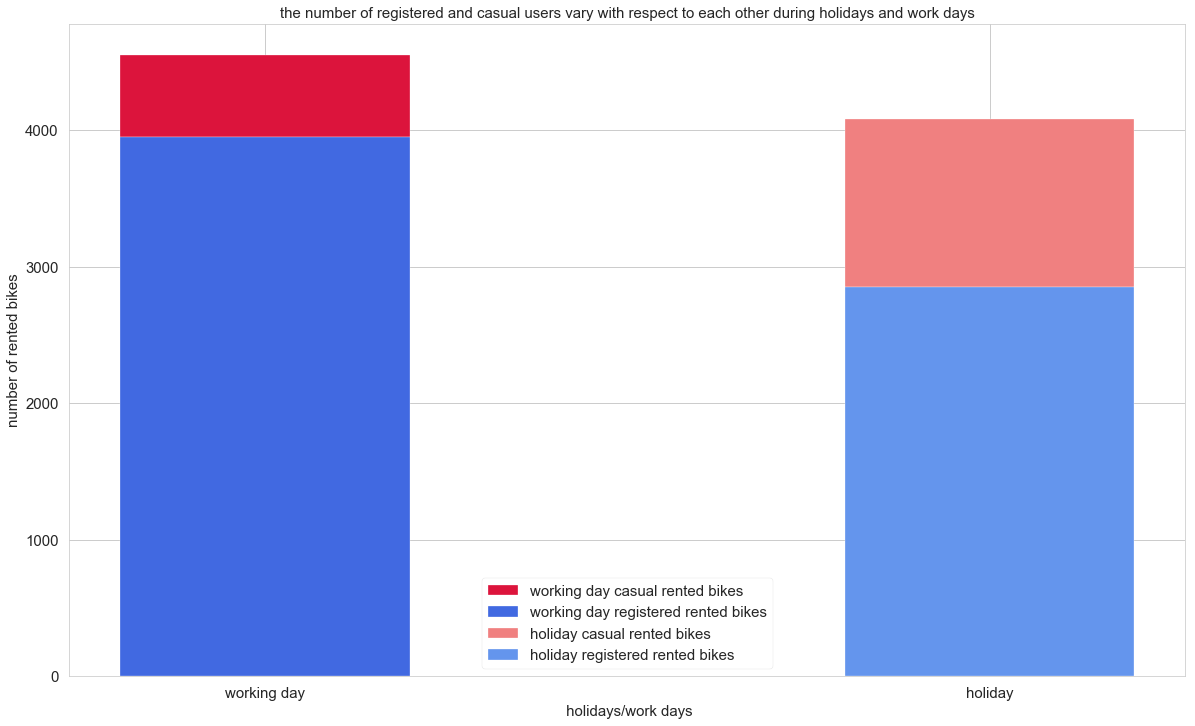

In [41]:
# YOUR CODE HERE
plt.figure(figsize=(20,12))
# index = np.arange(4)
# index = 0,1,2,3
c1 = df_wk_cnt['casual'].mean()
r1 = df_wk_cnt['registered'].mean()
c2 = df_holi_cnt['casual'].mean()
r2 = df_holi_cnt['registered'].mean()
# get each mean of the table
p1 = plt.bar(1, c1, width=0.4, bottom=r1,align='center',color = 'crimson')
# width = 0.4, c1 is at the top of r1
p2 = plt.bar(1, r1, width=0.4,align='center',color = 'royalblue')
p3 = plt.bar(2, c2, width=0.4, bottom=r2,align='center',color = 'lightcoral')
# # width = 0.4, c2 is at the top of r2, index = index+0.5
p4 = plt.bar(2, r2, width=0.4,align='center',color = 'cornflowerblue')
plt.xlabel(' holidays/work days',fontsize=15)
plt.ylabel('number of rented bikes',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.title('the number of registered and casual users vary with respect to each other during holidays and work days',
         fontsize=15)
plt.xticks([1,2], ("working day","holiday"),fontsize=15)
plt.legend([p1,p2,p3,p4], ['working day casual rented bikes',
                           'working day registered rented bikes',
                           'holiday casual rented bikes',
                           'holiday registered rented bikes'],fontsize = 15,loc = 'best')


plt.show()


<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [42]:
# Q3: It can be manifact that when it comes to holiday, the distribution of casual users is increasing 
# while the registered users are decreasing.
# In the working day, the working day registed rented bikes is about 4000. while in the holiday, the sum of cnt is just above 4000.

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

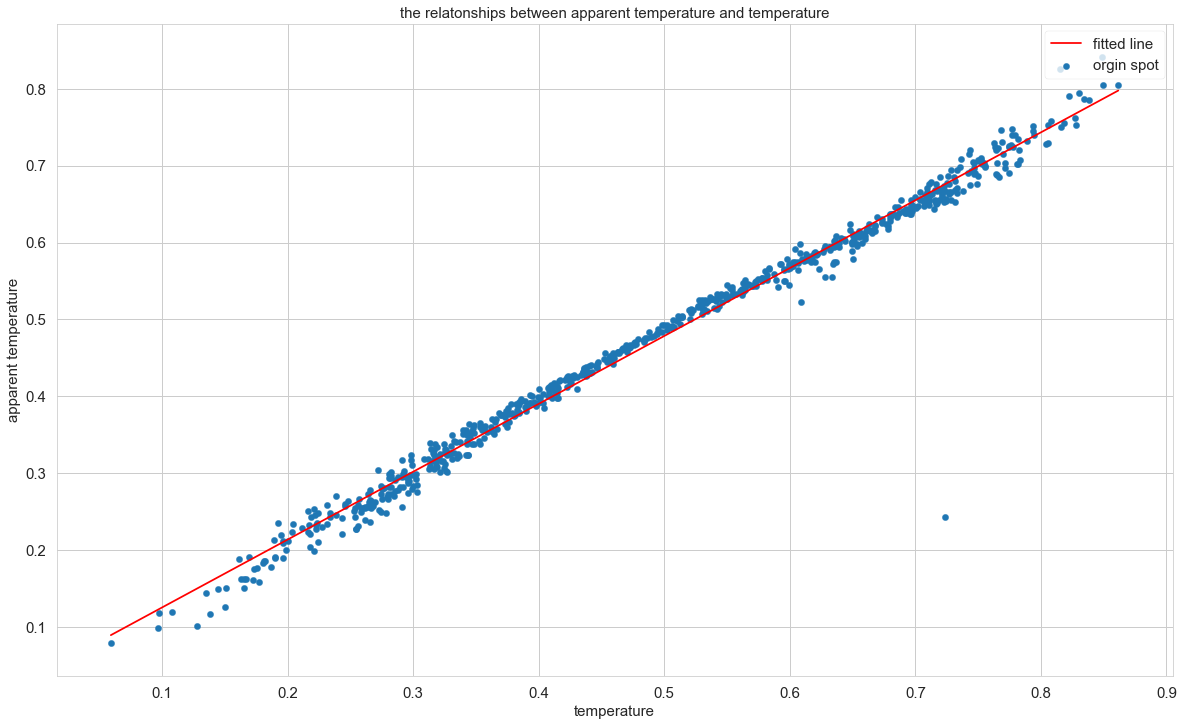

,temp,atemp
temp,1.000000,0.991702
atemp,0.991702,1.000000


In [43]:
# YOUR CODE HERE
plt.figure(figsize=(20,12))
# set the size of the figure
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x=(remove_dteday["temp"])
y=(remove_dteday["atemp"])
# get each of the column
plt.xlabel('temperature',fontsize = 15)
plt.ylabel('apparent temperature',fontsize = 15)
# set labels
plt.title('the relatonships between apparent temperature and temperature',fontsize = 15)
plt.scatter(x, y,40,label = 'orgin spot')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color = 'red',label = 'fitted line')
# add the fitting lines as 1 power
plt.legend(loc="upper right",prop={'size':15})
# set the legend
plt.show()
correlation = remove_dteday[['temp','atemp']].corr()
correlation 
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)


<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [44]:
# Q4: From the scatter graph, it can be manifest that temperature is highly correlated to the feeling temperature. When the temperture is too high
# or too low, people will have a higher or lower temperature of feeling. 

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

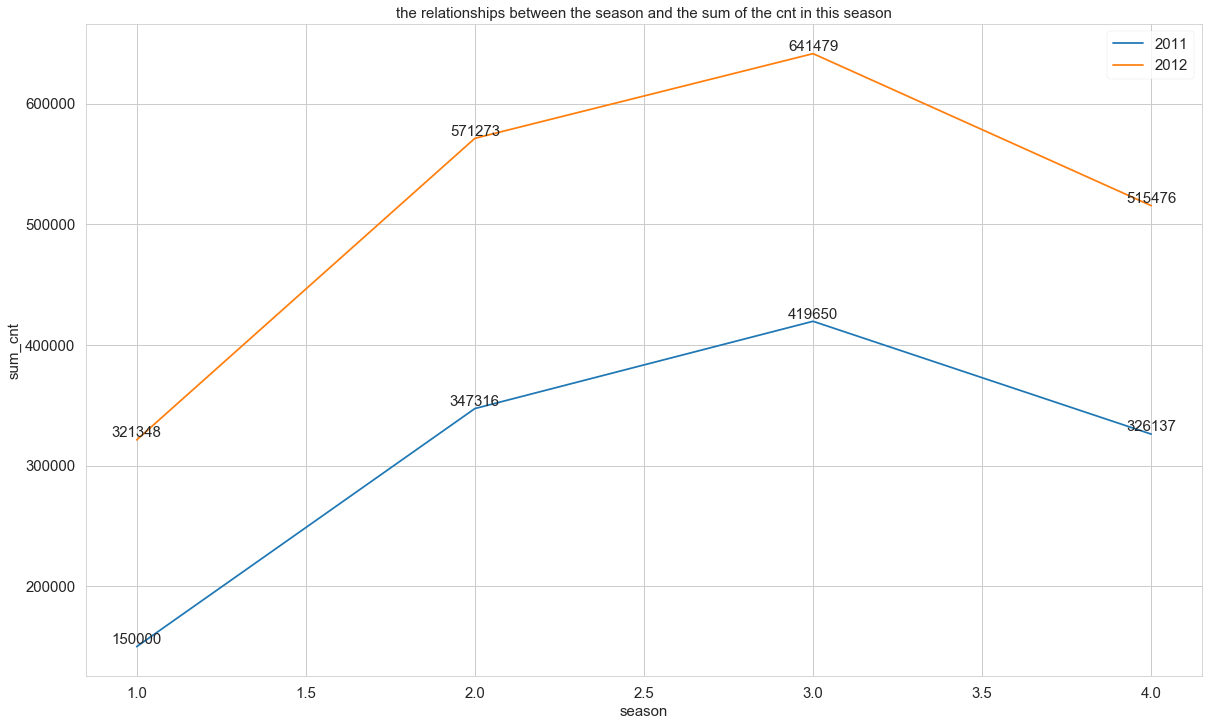

In [45]:
plt.figure(figsize=(20,12))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
season_0 = df_yr_cnt_0['season']
sum_cnt_0 = df_yr_cnt_0['cnt']
season_1 = df_yr_cnt_1['season']
sum_cnt_1 = df_yr_cnt_1['cnt']
plt.plot(season_0, sum_cnt_0,label = '2011')
plt.plot(season_1,sum_cnt_1,label = '2012')
plt.title("the relationships between the season and the sum of the cnt in this season",fontsize = 15)
plt.xlabel("season",fontsize = 15)
plt.ylabel("sum_cnt",fontsize = 15)

for a, b in zip(season_0, sum_cnt_0):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15)
    
for a, b in zip(season_1, sum_cnt_1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=15)
    
# Setting the digital label on the plot
plt.legend(fontsize =15)
plt.show()



<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [46]:
# Q5:# At first, from season 1 to season 3, it increases to the peak. and season 3 in both year0 and year1, has the most rented bike number and it decreases 
# in both year0 and year 1 in the season4. What is more, the sum of cnt in year 1 is much bigger than that in year 0.

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

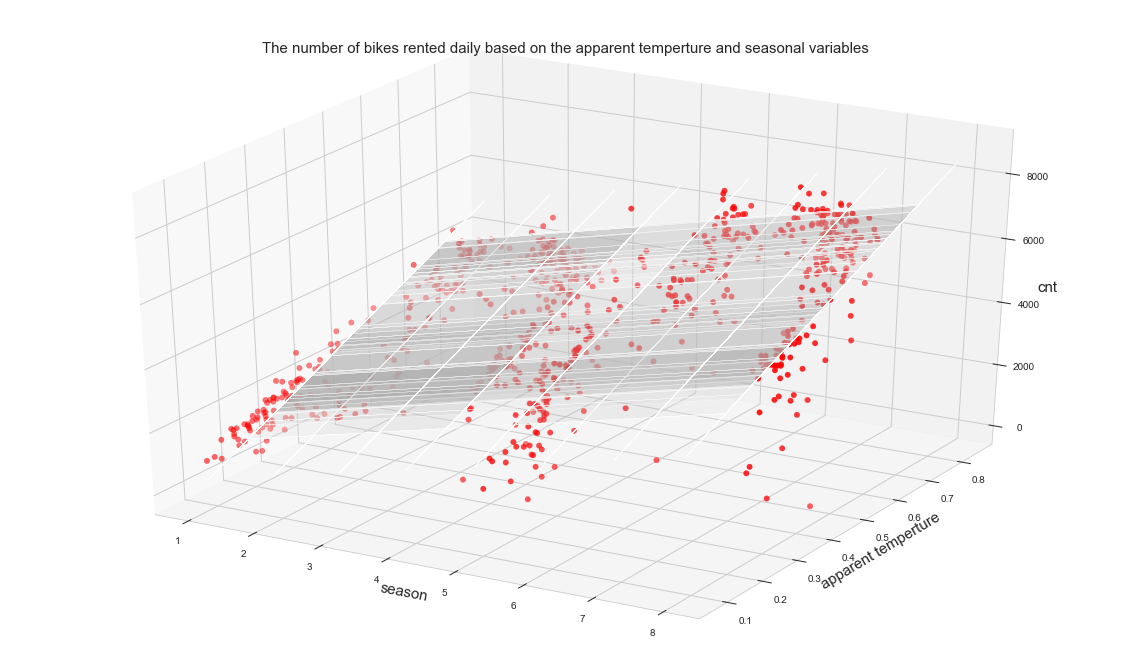

Intercept    -608.337993
season        497.798682
atemp        6056.517542
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     978.6
Date:                Thu, 04 Apr 2019   Prob (F-statistic):          4.65e-207
Time:                        12:53:05   Log-Likelihood:                -6092.6
No. Observations:                 731   AIC:                         1.219e+04
Df Residuals:                     728   BIC:                         1.221e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
# YOUR CODE HERE
X = season_atemp_cnt[['season','atemp']]
# as the heatmap shows that season, atemp have higher correlation to the cnt
Y = season_atemp_cnt['cnt']
statsmodel = sm.ols(formula="cnt ~ season + atemp", data=season_atemp_cnt)
result = statsmodel.fit()
# Get the formula like cnt = season + atemp ,data = season_atemp_cnt

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(season_atemp_cnt['season'], season_atemp_cnt['atemp'], season_atemp_cnt['cnt'], s = 30,c='r', marker='o')
# scatter each of point
xx, yy = np.meshgrid(season_atemp_cnt['season'], season_atemp_cnt['atemp'])

exog = pd.core.frame.DataFrame({'season':xx.ravel(),'atemp':yy.ravel()})
out = result.predict(exog=exog)
ax.plot_surface(xx, yy, out.values.reshape(xx.shape), color='white',alpha = 0.05)
# alpha =0.05 transparent
ax.set_xlabel('season',fontsize = 15)
ax.set_ylabel('apparent temperture',fontsize = 15)
ax.set_zlabel('cnt',fontsize = 15)

plt.title('The number of bikes rented daily based on the apparent temperture and seasonal variables',fontsize =15)
plt.show()
print(result.params)
print(result.summary())

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

In [54]:
predicted_season = 12 
# set season = 12, which is year 2013, season 4
predicted_atemp = 0.634534
# randomly pick a number and predict that
C = result.params['Intercept']
X = result.params['season']
Y = result.params['atemp']
print("the predicted rented number is:" ,(C + predicted_season*X + predicted_atemp*Y))

the predicted rented number is: 9208.312491085147


In [ ]:
# From the heatmap, i found out that for the weather variables the temp/atemp has higher correlation and other weather varaibles have lower
# correlation(<0.2) which is meaningless to list them all.
# As you can see, the regression result above, we just need the weather and atemp to get the predicted result.
# Z = C + MX + NY